In [ ]:
# 做data-argumentation 看看狀況--->遇到的問題是預處理有/255忘記了，所以data-argumentation又多/255一次導致跑不出答案---->另一個問題是
# 在fix做資訊訓練驗證時沒有用datagen.flow(...)，所以沒有真的做到argumentation--->改正ok
# 有發現B級芒果的預測率較低，不知如何調整feature 權重，讓準確率提升

In [ ]:
# 連結google
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from tensorflow import keras

In [ ]:
#  載入套件
from glob import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import keras
import os
import csv
from shutil import copyfile
from sklearn.model_selection import train_test_split
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# tensorflow深度學習模組套件
import tensorflow
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
# Keras深度學習模組套件
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras import utils as np_utils
from keras import backend as K
from keras import optimizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler, ModelCheckpoint
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Model

In [ ]:
load_x_train = np.load('/content/drive/My Drive/Colab Notebooks/AIMango/train1_preprocess.npz')

In [ ]:
y_train = load_x_train['y']

In [ ]:
print(len(load_x_train['y']))

5600


In [ ]:
x_train = load_x_train['x']

In [ ]:
load_x_test2 = np.load('/content/drive/My Drive/Colab Notebooks/AIMango/test1_preprocess.npz')

In [ ]:
y_test = load_x_test2['y']

In [ ]:
x_test = load_x_test2['x']

In [ ]:
print(x_test[0])

[[[ 88.  93.  96.]
  [ 83.  88.  91.]
  [ 83.  89.  92.]
  ...
  [ 97.  80.  24.]
  [ 99.  82.  25.]
  [ 98.  81.  25.]]

 [[ 87.  92.  95.]
  [ 83.  88.  91.]
  [ 84.  89.  93.]
  ...
  [101.  79.  24.]
  [104.  81.  27.]
  [101.  78.  24.]]

 [[ 83.  91.  94.]
  [ 80.  88.  90.]
  [ 78.  86.  88.]
  ...
  [114.  91.  34.]
  [111.  89.  31.]
  [104.  82.  24.]]

 ...

 [[144. 138. 135.]
  [145. 140. 137.]
  [149. 143. 140.]
  ...
  [141. 167. 167.]
  [134. 160. 161.]
  [130. 156. 157.]]

 [[146. 137. 132.]
  [152. 142. 140.]
  [159. 149. 149.]
  ...
  [130. 156. 157.]
  [125. 151. 152.]
  [121. 147. 148.]]

 [[142. 133. 124.]
  [143. 134. 127.]
  [151. 141. 139.]
  ...
  [128. 149. 152.]
  [123. 144. 147.]
  [121. 142. 145.]]]


In [ ]:
#做一次就好_
x_test = x_test/255.0
x_train = x_train/255.0

In [ ]:
y_train_cat = y_train
y_test_cat = y_test

In [ ]:
# 打映圖片訓練集的概況

print(type(x_train))
print(x_train.shape)

print(x_train[0].shape)
print(type(x_train[0]))
print("\n")
print(type(x_test))
print(x_test.shape)

print(x_test[0].shape)
print(type(x_test[0]))

<class 'numpy.ndarray'>
(5600, 224, 224, 3)
(224, 224, 3)
<class 'numpy.ndarray'>


<class 'numpy.ndarray'>
(800, 224, 224, 3)
(224, 224, 3)
<class 'numpy.ndarray'>


In [ ]:
# one-hot encoding
# y_train_cat = tensorflow.keras.utils.to_categorical(y_train, num_classes=3)
# y_test_cat = tensorflow.keras.utils.to_categorical(y_test, num_classes=3)

In [ ]:
x_train.shape, x_test.shape, y_train_cat.shape, y_test_cat.shape

((5600, 224, 224, 3), (800, 224, 224, 3), (5600, 3), (800, 3))

In [ ]:
# # 分配訓練集及測試集比例
x_valid = x_test[:400]
y_valid = y_test_cat[:400]
x_test = x_test[400:]
y_test = y_test_cat[400:]

In [ ]:
IMG_SIZE=224

In [ ]:
# # 2 文富同學版本
# model = Sequential()
# model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(2, 2), padding="same", input_shape=(224, 224, 3)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), padding="same"))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), padding="same"))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same"))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(2, 2), padding="same"))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Conv2D(filters=512, kernel_size=(2, 2), strides=(2, 2), padding="same"))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(GlobalAveragePooling2D())
# # model.add(Flatten())
# model.add(Dense(3, activation="softmax"))
# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# model.summary()

In [ ]:
# 3 李智揚老師第一周範例版本
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = Conv2D(filters=16, kernel_size=3, activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = MaxPool2D(2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = MaxPool2D(2)(x)
x = Flatten()(x)
x = Dense(64, activation=keras.activations.relu)(x)
# x = Dense(128, activation=keras.activations.relu)(x)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=inputs, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 106, 106, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 128)       0   

In [ ]:
# adam = optimizers.adam(lr=5)
model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.CategoricalCrossentropy(),
              metrics=['acc'])

In [ ]:
# zca_whitening 對輸入數據施加ZCA白化
# rotation_range 數據提升時圖片隨機轉動的角度
# width_shift_range 圖片寬度的某個比例，數據提升時圖片水平偏移的幅度
# shear_range 剪切強度（逆時針方向的剪切變換角度）
# zoom_range 隨機縮放的幅度
# horizontal_flip 進行隨機水平翻轉
# fill_mode ‘constant’，‘nearest’，‘reflect’或‘wrap’之一，當進行變換時超出邊界的點將根據本參數給定的方法進行處理

datagen = ImageDataGenerator(
    zca_whitening=False,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
# 導入圖像增強參數
datagen.fit(x_train)
# x_train = x_train/255
# x_test = x_test/255
print('rescale！done!')

rescale！done!


In [ ]:
# 設定超參數HyperParameters 
batch_size =  20
epochs = 10

In [ ]:
# 檔名設定
file_name = str(epochs)+'_'+str(batch_size)

In [ ]:
# 加入EarlyStopping以及Tensorboard等回調函數
CB = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
TB = keras.callbacks.TensorBoard(log_dir='./log'+"_"+file_name, histogram_freq=1)

In [ ]:
history = model.fit(
                    datagen.flow(x = x_train , y = y_train_cat, batch_size = batch_size),
                    validation_steps=32,
                    steps_per_epoch=280,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_valid, y_valid),
                    callbacks = [CB]
)

Epoch 1/100
280/280 [==============================] - 93s 332ms/step - loss: 1.0147 - acc: 0.4809 - val_loss: 0.9103 - val_acc: 0.5350
Epoch 2/100
280/280 [==============================] - 87s 310ms/step - loss: 0.9456 - acc: 0.5302 - val_loss: 0.9169 - val_acc: 0.5425
Epoch 3/100
280/280 [==============================] - 87s 309ms/step - loss: 0.9262 - acc: 0.5439 - val_loss: 0.8935 - val_acc: 0.5550
Epoch 4/100
280/280 [==============================] - 87s 311ms/step - loss: 0.9212 - acc: 0.5504 - val_loss: 0.8988 - val_acc: 0.5600
Epoch 5/100
280/280 [==============================] - 87s 310ms/step - loss: 0.9221 - acc: 0.5487 - val_loss: 0.9481 - val_acc: 0.5325
Epoch 6/100
280/280 [==============================] - 87s 310ms/step - loss: 0.9220 - acc: 0.5525 - val_loss: 0.8752 - val_acc: 0.5575
Epoch 7/100
280/280 [==============================] - 87s 310ms/step - loss: 0.8907 - acc: 0.5795 - val_loss: 0.7801 - val_acc: 0.6450
Epoch 8/100
280/280 [===========================

In [ ]:
import os
# 儲存model
dir_path = "/content/drive/My Drive/Colab Notebooks/AIMango/Trained_model_mango/0625"
if os.path.exists(dir_path):
  model.save("/content/drive/My Drive/Colab Notebooks/AIMango/Trained_model_mango/0625/simplecnn_argumentation.h5")
else:
  os.mkdir(dir_path)
  model.save(dir_path + "/simplecnn_argumentation.h5")

# 儲存訓練完的accuracy, loss
import pickle
with open(dir_path + "/simplecnn_argumentation.pickle", "wb") as file:
  pickle.dump(history.history, file)

In [ ]:
history = history.history

Text(0.5, 1.0, 'acc')

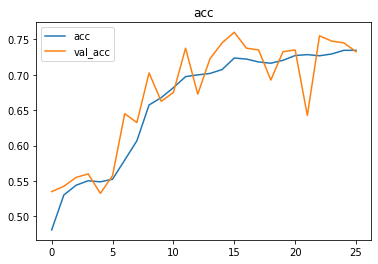

In [ ]:
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('acc')

Text(0.5, 1.0, 'loss')

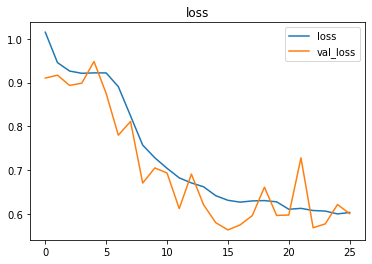

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

In [ ]:
accuracy = model.evaluate(x_test, y_test)
accuracy

400/400 [==============================] - 3s 6ms/step


[0.5762557172775269, 0.7574999928474426]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = np.argmax(y_test, axis=-1)
y_pred = np.argmax(model.predict(x_test), axis=-1)   #argmax 將每格中最大的值丟出
print(y_true.shape, y_pred.shape)
target_names = [str(i) for i in range(3)]
print(classification_report(y_true, y_pred, target_names=target_names))

import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true, y_pred)
trans=["0","1","2"]
c = ["{}(預測)".format(i) for i in trans]
i = ["{}(真實)".format(i) for i in trans]
pd.DataFrame(mat, columns=c, index=i)
# print(confusion_matrix(y_true, y_pred))
#所以橫的是 y_pred,直的是y_true

(400,) (400,)
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       138
           1       0.75      0.54      0.63       137
           2       0.82      0.86      0.84       125

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.75       400
weighted avg       0.76      0.76      0.75       400



,0(預測),1(預測),2(預測)
0(真實),122,14,2
1(真實),41,74,22
2(真實),7,11,107
